In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Importing dataset:
>- Unnamed:0 column
>- Creating a new binary column

In [2]:
pd.read_csv('./data/Default.csv')

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


* Note : So, to make it more explicit to understand when we say **`index_col=0`**, it placed the first column as the index in the dataFrame rather appearing as **`Unnamed: 0`** .

In [3]:
# importing csv file with the first column 0 as index
df = pd.read_csv('./data/Default.csv', index_col=0)
df

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
...,...,...,...,...
9996,No,No,711.555020,52992.378914
9997,No,No,757.962918,19660.721768
9998,No,No,845.411989,58636.156984
9999,No,No,1569.009053,36669.112365


In [4]:
# Creating a column 'default_binary' with values (0 and 1)
df['default_binary'] = df.default.apply(lambda x : 1 if x == 'Yes' else 0)

In [5]:
df.head()

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


# Classification in ML

Classification is an area of supervised machine learning that tries to predict which class or category some entity belongs to, based on its features

## Logistic Regression

### Why not linear regression?

- 1st reason: Imagine you are trying to predict medical condition on a multilabel setup:

\begin{equation}
  Y =
    \begin{cases}
      0 & \text{if pneumonia}  \\
      1 & \text{if respiratory disease}\\
      2 & \text{if covid}
    \end{cases}       
\end{equation}

Using this coding implies an orderring on the outcomes. Not only that, it implies that the distance between `pneumonia` to `respiratory disease` is the same as from `respiratory disease` to `covid`. Also, changing the order would reasonably affect the linear regression obtained.

## For binary cases, then?

\begin{equation}
  Y =
    \begin{cases}
      0 & \text{if not pneumonia}  \\
      1 & \text{if pneumonia}
    \end{cases}       
\end{equation}

In [6]:
df.head()

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


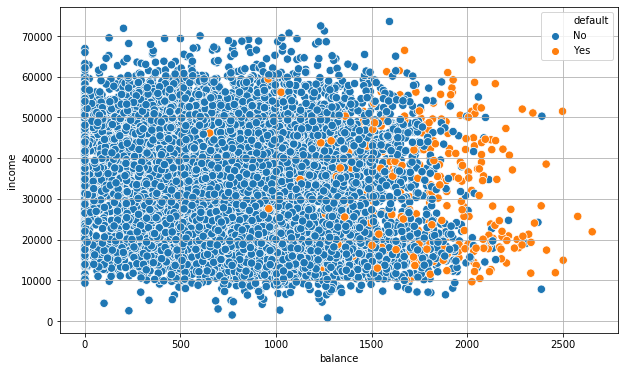

In [7]:
plt.figure(figsize=(10,6))
           
sns.scatterplot('balance', 'income', hue='default', data=df, s=70, palette='tab10')
plt.grid()

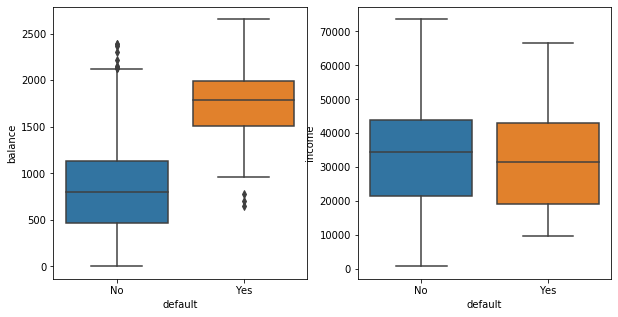

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(x='default', y='balance', data=df, ax=ax[0])
sns.boxplot(x='default', y='income', data=df, ax=ax[1]);

---

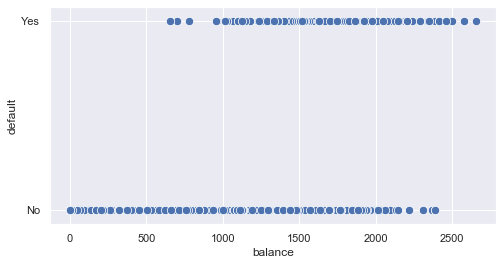

In [9]:
# 'Default' binary column at y-axis
sns.set()
plt.figure(figsize=(8,4))
sns.set()
sns.scatterplot(x='balance', y='default', data=df, s=70);

---

In [10]:
from sklearn.linear_model import LogisticRegression

X = df[['balance']]
y = df['default']

lr = LogisticRegression()
lr.fit(X, y)

predictions = lr.predict(X)

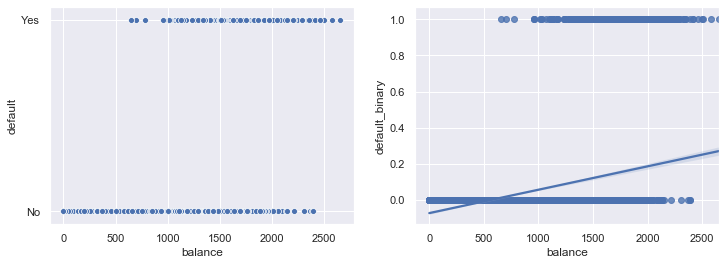

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x='balance', y='default', data=df, ax=ax[0])
sns.regplot(x='balance', y='default_binary', data=df, ax=ax[1])

- Predictions may be out of range.
- But yeah, the predictions will be ordered.
- Problem is - this approach cannot be extended to qualitative responses containing more than two levels.

Text(0.5, 1.0, 'Logistic Regression')

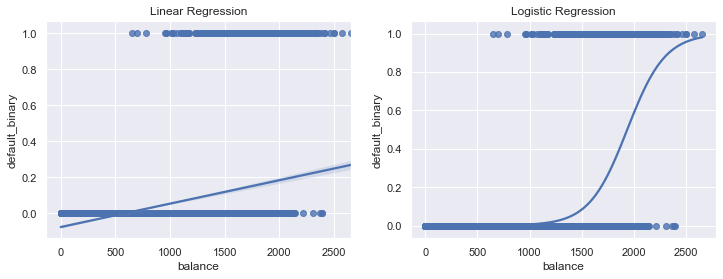

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(x='balance', y='default_binary', data=df, ax=ax[0])
sns.regplot(x='balance', y='default_binary', data=df, logistic=True, ci=None, ax=ax[1])

ax[0].set_title('Linear Regression')
ax[1].set_title('Logistic Regression')

## S-shaped curve.
$$ \frac{e^{x}}{(1+e^{x})} $$

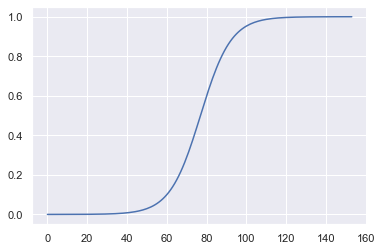

In [18]:
x = np.arange(-10,10,0.13)
plt.plot(np.exp(x)/(1+np.exp(x)));

## Linear Regression

$$ y = P(default=Yes | balance) = a_0 + a_1\cdot balance $$

## Logistic Regression

$$ P(default=Yes | balance) = \frac{e^{a_0 + a_1\cdot x}}{1 + e^{a_0 + a_1\cdot x}}$$



# In Python

In [19]:
df

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0
...,...,...,...,...,...
9996,No,No,711.555020,52992.378914,0
9997,No,No,757.962918,19660.721768,0
9998,No,No,845.411989,58636.156984,0
9999,No,No,1569.009053,36669.112365,0


In [21]:
from sklearn.linear_model import LogisticRegression

X = df[['balance']]
y = df['default_binary']

logistic = LogisticRegression()
logistic.fit(X, y)

predictions = logistic.predict(X)

In [22]:
logistic.score(X,y)

0.9725

In [23]:
list(zip(logistic.predict(X),y))

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 

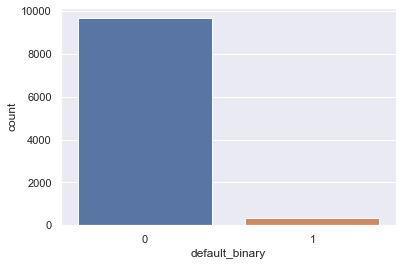

In [26]:
sns.countplot(y);

In [27]:
df.default_binary.value_counts(normalize=True)

0    0.9667
1    0.0333
Name: default_binary, dtype: float64

$$ P(default) = \frac{e^{a_0 + a_1\cdot x}}{1 + e^{a_0 + a_1\cdot x}}$$

In Python, as soon as you `.fit()` your logistic regression, you'll be able to run the `.predict_proba()` method.

In [30]:
logistic.predict(X)

10000

In [32]:
logistic.predict_proba(X) # [0] - 0 , [1] - 1

array([[9.98694319e-01, 1.30568146e-03],
       [9.97887402e-01, 2.11259754e-03],
       [9.91405252e-01, 8.59474814e-03],
       ...,
       [9.97533484e-01, 2.46651596e-03],
       [8.83240365e-01, 1.16759635e-01],
       [9.99928552e-01, 7.14476480e-05]])

> This will display the probabilities of being 0 (the first column of the result) and the probabilities of being 1 (the second column of the result).

In [33]:
logistic.predict_proba(X)[:,1]

array([1.30568146e-03, 2.11259754e-03, 8.59474814e-03, ...,
       2.46651596e-03, 1.16759635e-01, 7.14476480e-05])

# mlxtend.plotting

In [35]:
from mlxtend.plotting import plot_decision_regions

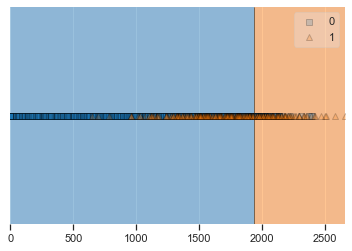

In [36]:
plot_decision_regions(X=np.array(df[['balance']]),       # array-like Feature Matrix
                      y=np.array(df['default_binary']),  # array-like True class labels
                      clf=logistic,                      # Classifier object - Must have a .predict method
                      scatter_kwargs={'alpha':0.2}       # dict - Keyword arguments for underlying matplotlib scatter function              
                     )

# Another Example - More than 1 dimension

In [39]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.4)

In [40]:
X

array([[ 0.01876396,  1.17568665],
       [ 0.51516603,  0.9736218 ],
       [-1.02141738, -0.12349245],
       ...,
       [ 0.52105899, -0.14113006],
       [ 0.44946213,  0.90834059],
       [ 1.24063532,  0.89546747]])

In [41]:
y

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,

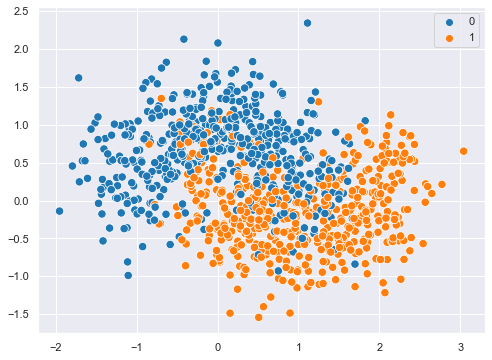

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, s=70, palette='tab10');

In [48]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
logistic_regression.coef_

array([[ 1.23486111, -2.46203712]])

In [50]:
logistic_regression.intercept_

array([-0.00654399])

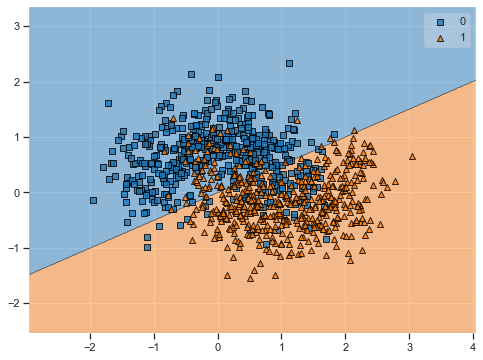

In [53]:
plt.figure(figsize=(8,6))
plot_decision_regions(X, y, logistic_regression);